Parte I - Analizando la base

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
#Importamos el dataset
os.chdir("C:/Users/rodri/OneDrive/Escritorio/Maestría/Big Data/BigData/TP2")
#Abrimos el dataset
df = pd.read_excel("usu_individual_T123.xlsx")

In [36]:
df=pd.read_excel("usu_individual_T123.xlsx")
print(df.head(3))
print(df.columns)


                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORVWHLMKOCDEOHCH00720228  2023          1          1           5    0   
1  TQRMNOPSTHKMKPCDEOHCH00781447  2023          1          1           1    1   
2  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  CH03  CH04                 CH05  CH06  \
0      44       N          91      112     5     1  2015-10-29 00:00:00     7   
1      44       N          91      190     1     2  1939-05-29 00:00:00    83   
2      44       N          91      134     1     2  1992-12-20 00:00:00    30   

   CH07  CH08  CH09  CH10  CH11  CH12  CH13  CH14  CH15  CH15_COD  CH16  \
0     5   1.0     1     1     1     2     2   2.0     2       NaN     1   
1     4   1.0     1     2     0     4     1   NaN     2       NaN     1   
2     1   1.0     1     2     0     4     1   NaN     1       NaN     1   

   CH16_COD  NIVEL_ED  ESTADO  CAT_OCUP  CAT_INAC

<module 'pandas' from 'c:\\Users\\rodri\\.julia\\environments\\v1.9\\.CondaPkg\\env\\Lib\\site-packages\\pandas\\__init__.py'>

In [35]:
#Filtro por aglomerados tomando solo los aglomerados 32 y 33
df=df[(df['AGLOMERADO']==32)| (df['AGLOMERADO'] == 33)]
pd.set_option('display.max_columns', None)
pd

In [34]:
# Filtrar valores negativos
df = df[(df['IPCF'] >= 0) & (df['CH06'] >= 0)]


NameError: name 'read' is not defined

In [32]:
#Filtro por sexo y pongo los nombres utilizados en la encuesta

sex_composition = df['CH04'].replace({1: 'Varón', 2: 'Mujer'}).value_counts()


NameError: name 'CH04' is not defined

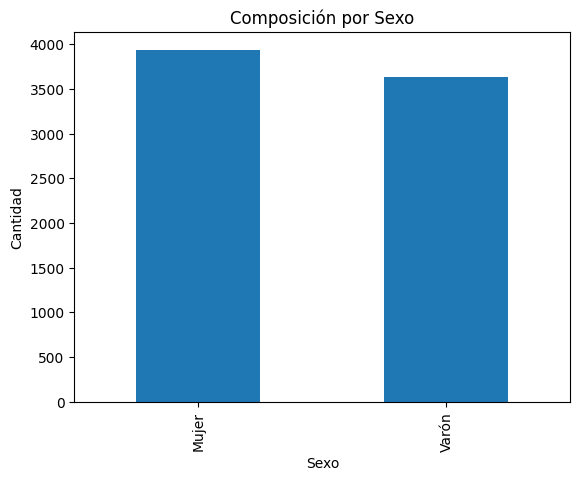

In [15]:
#Ahora realizo el gráfico de barras para ver la composición por sexo
sex_composition.plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Composición por Sexo')
plt.show()

In [16]:
#Armo la matriz de correlaciones
correlation_matrix = df[['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']].corr()
print(correlation_matrix)



              CH04      CH07      CH08  NIVEL_ED    ESTADO  CAT_INAC      IPCF
CH04      1.000000  0.000642 -0.019780  0.050053  0.111855  0.079618 -0.024220
CH07      0.000642  1.000000  0.071207 -0.081625  0.415376  0.407252 -0.043297
CH08     -0.019780  0.071207  1.000000 -0.000644  0.019759  0.088826 -0.069497
NIVEL_ED  0.050053 -0.081625 -0.000644  1.000000 -0.205541 -0.045002  0.151222
ESTADO    0.111855  0.415376  0.019759 -0.205541  1.000000  0.822162 -0.107492
CAT_INAC  0.079618  0.407252  0.088826 -0.045002  0.822162  1.000000 -0.110865
IPCF     -0.024220 -0.043297 -0.069497  0.151222 -0.107492 -0.110865  1.000000


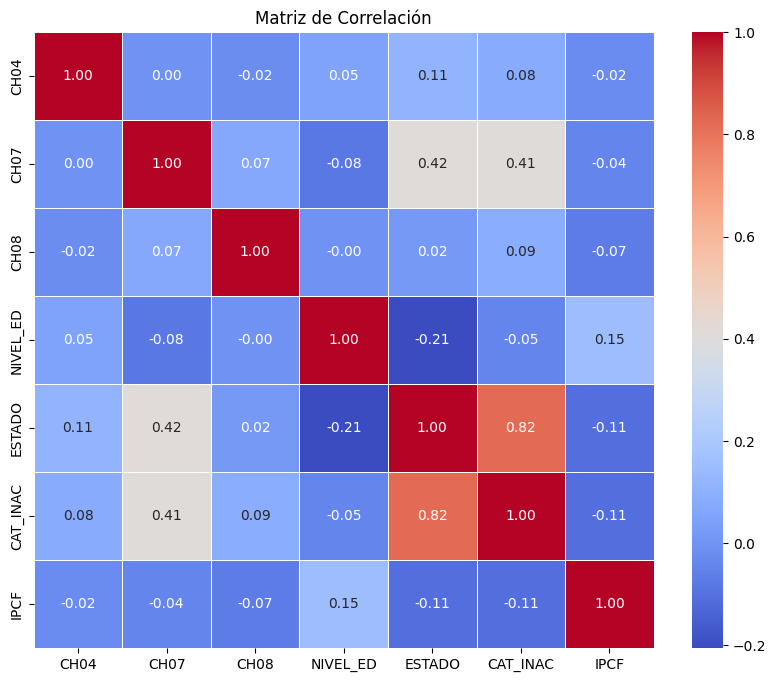

In [20]:
# CreO un mapa de calor usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [23]:
#¿Cuantos desocupados hay en la muestra? ¿Cu ́antos inactivos? ¿Cu ́al es
#la media de ingreso per c ́apita familiar (IPCF) seg ́un estado (ocupado,
#desocupado, inactivo)?


#Filtro por estado laboral
desocupados = df[df['ESTADO'] == 2]
inactivos = df[df['ESTADO'] == 3]
ocupados = df[df['ESTADO'] == 1]

#Veo sus ingresos per capita familiar según su estado
media_ipcf_ocupados = ocupados['IPCF'].mean()
media_ipcf_desocupados = desocupados['IPCF'].mean()
media_ipcf_inactivos = inactivos['IPCF'].mean()

#Imprimo los resultados y respuestas a las preguntas: 
print(f'Desocupados: {len(desocupados)}')
print(f'Inactivos: {len(inactivos)}')
print(f'Media IPCF (ocupados): ${media_ipcf_ocupados}')
print(f'Media IPCF (desocupados): ${media_ipcf_desocupados}')
print(f'Media IPCF (inactivos): ${media_ipcf_inactivos}')




#WARNINGG
#Acá me dio algo raro, los inactivos tienen un sueldo promedio mayor que los desocupados
#¿Por qué? ¿Será porque los inactivos son personas que no trabajan pero tienen ingresos como jubilados o pensionados?


Desocupados: 286
Inactivos: 2837
Media IPCF (ocupados): $59579.44291512915
Media IPCF (desocupados): $25536.022202797205
Media IPCF (inactivos): $40067.99605216778


In [49]:
adulto_equiv_data = pd.read_excel("tabla_adulto_equiv.xlsx")


In [50]:
# Cargar el archivo "tabla_adulto_equiv.xlsx" que contiene los valores de adulto equivalente
adulto_equiv_data = pd.read_excel("tabla_adulto_equiv.xlsx")
# Fusionar los datos de "adulto_equiv_data" con el DataFrame principal usando la columna 'Edad' y 'Sexo'
df = df.merge(adulto_equiv_data, on=['Edad', 'Sexo'], how='left')

# Calcular el valor de "adulto equivalente" para cada persona multiplicando por el factor correspondiente
df['ad_equiv'] = df['adulto_equiv'] * df['Cantidad']  # Suponiendo que tienes una columna 'Cantidad'

# Sumar los valores de "ad_equiv" por hogar y guardar el resultado en una nueva columna "ad_equiv_hogar"
df['ad_equiv_hogar'] = df.groupby('NRO_HOGAR')['ad_equiv'].transform('sum')


KeyError: 'Sexo'

In [53]:
# Paso 7: Personas que no respondieron ingresos
norespondieron_df = df[(df['DECIFR'] == 12) | (df['DECIFR'] == 13) & (df['ITF'] == 0)]
respondieron_df = df[(df['DECIFR'] != 12) & (df['DECIFR'] != 13) & (df['ITF'] != 0)]

#Cantidad de personas que no respondieron ingresos
print(f'Cantidad de personas que no respondieron ingresos: {len(norespondieron_df)}')
#Cantidad de personas que respondieron ingresos
print(f'Cantidad de personas que respondieron ingresos: {len(respondieron_df)}')


#RAROOOO

Cantidad de personas que no respondieron ingresos: 11550
Cantidad de personas que respondieron ingresos: 36956


In [ ]:
#Identifico las personas pobres bajo este enfoque
canasta_basica_total = 57371.05
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * canasta_basica_total
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)


In [ ]:
# Contar cuántos pobres se identificaron
pobres_identificados = respondieron['pobre'].sum()
print(f'Número de personas pobres identificadas: {pobres_identificados}')